In [1]:
import numpy as np

import paperfig as pf
pf.set_fontscale(2.)

In [2]:
from getdist import plots
from getdist import MCSamples
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [3]:
savefig = False

In [4]:
# from https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

## load saved parameter posteriors

In [5]:
glee_pl_samples = np.genfromtxt('../glee_pl_params.csv', skip_header=1, delimiter=',')

glee_composite_samples = np.genfromtxt('../glee_comp_params.csv', skip_header=1, delimiter=',')

In [6]:
size = 100000

In [7]:
glee_eq_pl_indices = np.random.choice(np.arange(glee_pl_samples.shape[0]), size=size, p=glee_pl_samples[:, 1]/np.sum(glee_pl_samples[:, 1]))
glee_eq_comp_indices = np.random.choice(np.arange(glee_composite_samples.shape[0]), size=size, p=glee_composite_samples[:, 1]/np.sum(glee_composite_samples[:, 1]))

glee_pl_samples_eq_weight = glee_pl_samples[glee_eq_pl_indices, :]
glee_composite_samples_eq_weight = glee_composite_samples[glee_eq_comp_indices, :]
            

glee_pl_indices = np.random.choice(np.arange(glee_pl_samples.shape[0]), size=size, p=glee_pl_samples[:, 0]/np.sum(glee_pl_samples[:, 0]))
glee_comp_indices = np.random.choice(np.arange(glee_composite_samples.shape[0]), size=size, p=glee_composite_samples[:, 0]/np.sum(glee_composite_samples[:, 0]))

glee_pl_samples_bic_weight = glee_pl_samples[glee_pl_indices, :]
glee_composite_samples_bic_weight = glee_composite_samples[glee_comp_indices, :]

Removed no burn in
Removed no burn in


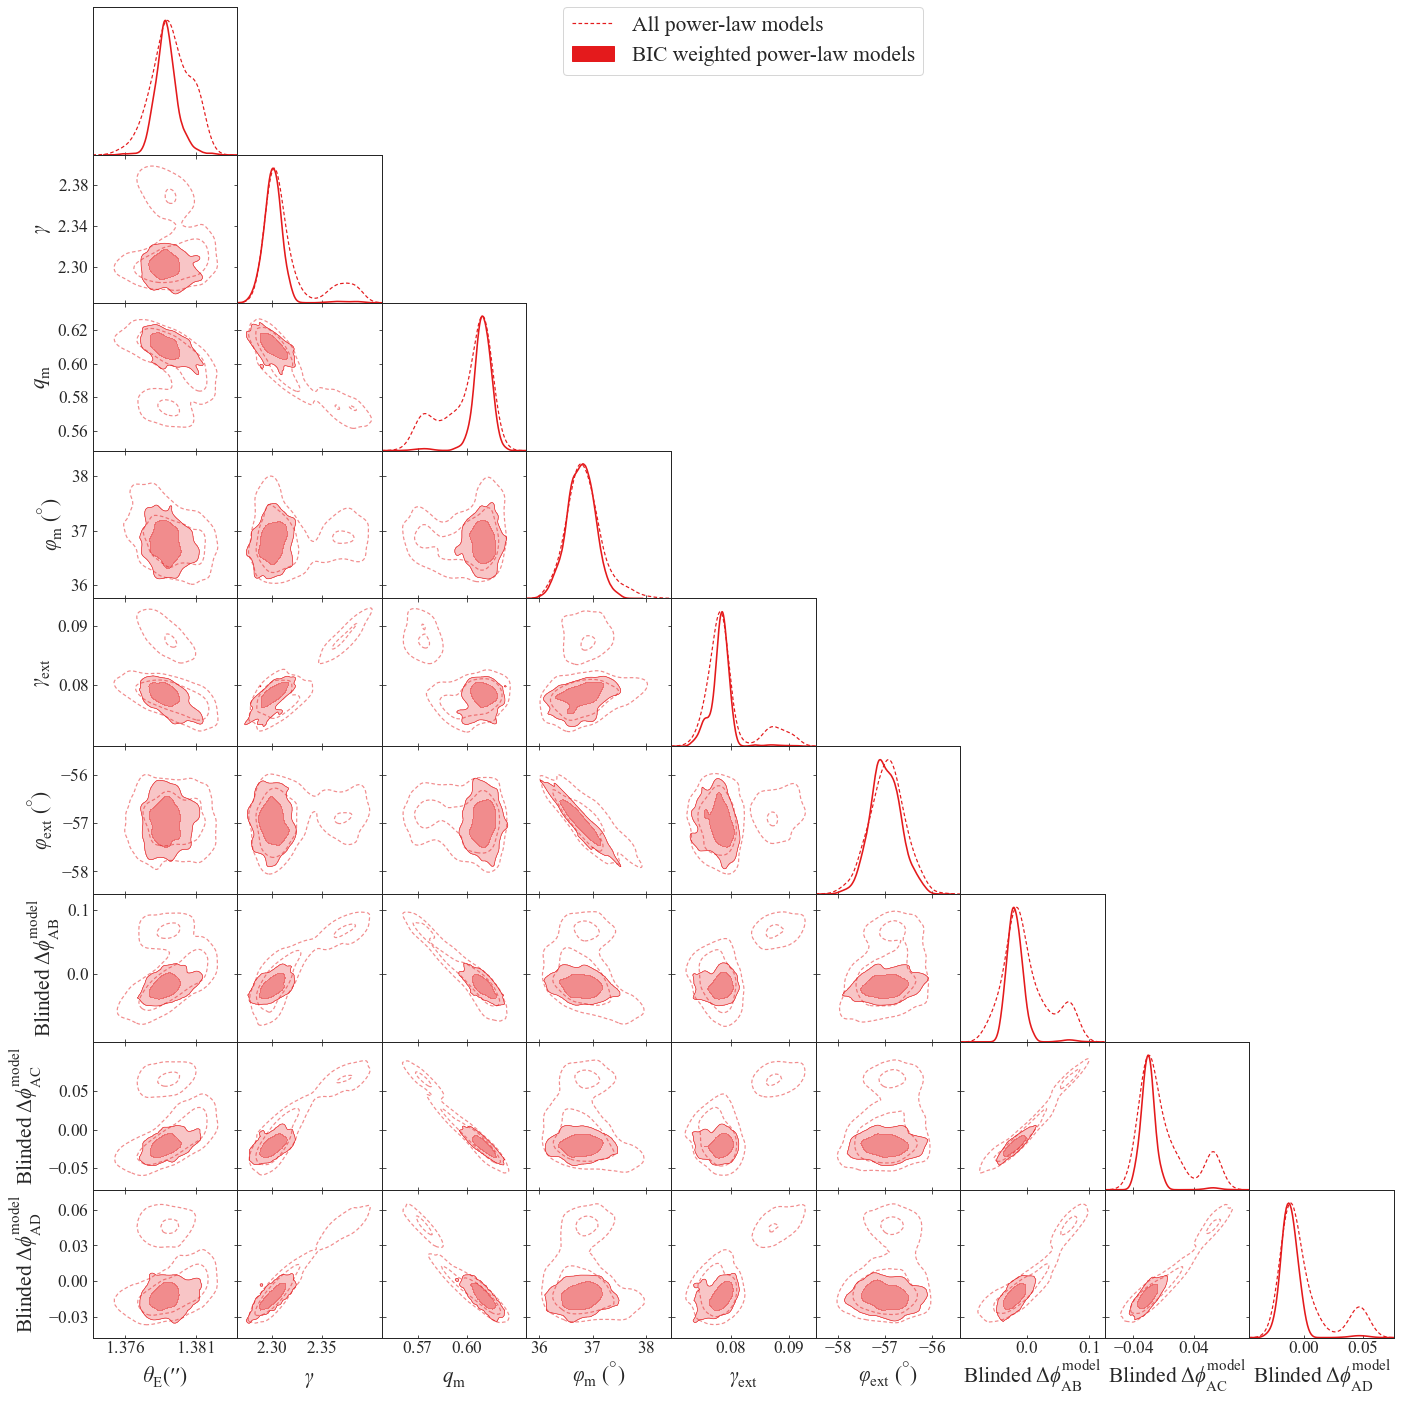

In [10]:
%matplotlib inline

pf.set_fontscale(3.)

import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

#weight,td_ab,td_ac,td_ad
all_pl_samples = np.copy(glee_pl_samples_eq_weight[:, [5, 8, 6, 7, 9, 10, 2, 3, 4]])

#mean_gamma = np.mean(all_pl_samples[1])
mean_dphi_AB = np.mean(all_pl_samples[:, -3])
mean_dphi_AC = np.mean(all_pl_samples[:, -2])
mean_dphi_AD = np.mean(all_pl_samples[:, -1])

# blinding some parameters
#all_pl_samples[1] = all_pl_samples[1]/mean_gamma - 1.
all_pl_samples[:, -3] = all_pl_samples[:, -3]/mean_dphi_AB - 1.
all_pl_samples[:, -2] = all_pl_samples[:, -2]/mean_dphi_AC - 1.
all_pl_samples[:, -1] = all_pl_samples[:, -1]/mean_dphi_AD - 1.

glee_powerlaw_mc_samples= MCSamples(samples=all_pl_samples, 
                               names=['theta_E', 
                                      'gamma', 'q_m', 'phi_m', 'gamma_ext', 'psi_ext', #'invariant_grad',
                                      'dphi_AB', 'dphi_AC', 'dphi_AD'
                                      #'dphi_AB', 'dphi_AC', 'dphi_AD'
                                     ], 
                              labels=['{\\theta}_{\\rm{E}} (\prime\prime)', 
                                      '\\gamma', #'{\\gamma}/\\overline{{\\gamma}} - 1',
                                      'q_{\\rm m}',
                                      '\\varphi_{\\rm m}\\ {(^{\circ})}',
                                      '\\gamma_{\\rm{ext}}', 
                                      '\\varphi_{\\rm{ext}}\\ {(^{\circ})}', 
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AB}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AB} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AB}} - 1',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AC}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AC} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AC}} - 1',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AD}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AD} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AD}} - 1',
                                      #'\\xi_{\\rm rad}',
                                      #'\\Delta \\phi^{\\rm model}_{\\rm AB}', #'\\Delta \\phi^{\\rm eff}_{\\rm AB} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AB}} - 1',
                                      #'\\Delta \\phi^{\\rm model}_{\\rm AC}', #'\\Delta \\phi^{\\rm eff}_{\\rm AC} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AC}} - 1',
                                      #'\\Delta \\phi^{\\rm model}_{\\rm AD}', #'\\Delta \\phi^{\\rm eff}_{\\rm AD} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AD}} - 1',
                                     ],
                  )



smoothing_scale = 0.3
glee_powerlaw_mc_samples.updateSettings({'smooth_scale_2D': smoothing_scale})
glee_powerlaw_mc_samples.updateSettings({'smooth_scale_1D': smoothing_scale})

bic_weighted_pl_samples = np.copy(glee_pl_samples_bic_weight[:, [5, 8, 6, 7, 9, 10, 2, 3, 4]])

#mean_gamma = np.mean(all_pl_samples[1])
# mean_dphi_AB = np.mean(bic_weighted_pl_samples[-3])
# mean_dphi_AC = np.mean(bic_weighted_pl_samples[-2])
# mean_dphi_AD = np.mean(bic_weighted_pl_samples[-1])

# blinding some parameters
#all_pl_samples[1] = all_pl_samples[1]/mean_gamma - 1.
bic_weighted_pl_samples[:, -3] = bic_weighted_pl_samples[:, -3]/mean_dphi_AB - 1.
bic_weighted_pl_samples[:, -2] = bic_weighted_pl_samples[:, -2]/mean_dphi_AC - 1.
bic_weighted_pl_samples[:, -1] = bic_weighted_pl_samples[:, -1]/mean_dphi_AD - 1.


glee_powerlaw_mc_samples_bic = MCSamples(samples=bic_weighted_pl_samples, 
                               names=['theta_E', 
                                      'gamma', 'q_m', 'phi_m', 'gamma_ext', 'psi_ext', #'invariant_grad',
                                      'dphi_AB', 'dphi_AC', 'dphi_AD'
                                     ], 
                              labels=['{\\theta}_{\\rm{E}}', 
                                      '\\gamma', #'{\\gamma}/\\overline{{\\gamma}} - 1',
                                      'q_{\\rm m}',
                                      '\\varphi_{\\rm m}\\ {(^{\circ})}',
                                      '\\gamma_{\\rm{ext}}', 
                                      '\\varphi_{\\rm{ext}}\\ {(^{\circ})}', 
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AB}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AB} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AB}} - 1',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AC}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AC} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AC}} - 1',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AD}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AD} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AD}} - 1',
                                      #'\\xi_{\\rm rad}',
                                      #'\\Delta \\phi^{\\rm model}_{\\rm AB}', #'\\Delta \\phi^{\\rm eff}_{\\rm AB} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AB}} - 1',
                                      #'\\Delta \\phi^{\\rm model}_{\\rm AC}', #'\\Delta \\phi^{\\rm eff}_{\\rm AC} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AC}} - 1',
                                      #'\\Delta \\phi^{\\rm model}_{\\rm AD}', #'\\Delta \\phi^{\\rm eff}_{\\rm AD} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AD}} - 1',
                                     ],
                  )

smoothing_scale = 0.3
glee_powerlaw_mc_samples_bic.updateSettings({'smooth_scale_2D': smoothing_scale})
glee_powerlaw_mc_samples_bic.updateSettings({'smooth_scale_1D': smoothing_scale})

    
### 

pf.set_fontscale(2.)

g = plots.getSubplotPlotter(subplot_size=2.2)
g.settings.lw_contour = 1.
g.settings.alpha_factor_contour_lines = 2.
g.settings.solid_contour_palefactor = 0.5
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 24

g.settings.legend_fontsize = 24

colors = [pf.cb_red, pf.cb_red]

g.triangle_plot([glee_powerlaw_mc_samples, glee_powerlaw_mc_samples_bic],
                 legend_labels=['All power-law models', 
                                'BIC weighted power-law models'],
                 filled=[False, True], shaded=False,
                 alpha_filled_add=.5, 
                 contour_lws=[1.2, 1.6], 
                 contour_ls=['--', '-'],
                 normed=True,
                 #filled=False,
                 #contour_colors=[sns.xkcd_rgb['emerald'], sns.xkcd_rgb['bright orange']], 
                 contour_args={'alpha': .5},
                 #line_args={'lw': 7., "zorder": 30},
                 #line_args={'lw': 1., 'alpha': 1.}
                 contour_colors=colors,
                 param_limits={
                      #'theta_E': (1.35, 1.40), #'psi_ext': (-38, -26), 
#                                'gamma': (2.25, 2.42),
#                                'q_m': (0.55, 0.68),
#                                'phi_m': (32, 42), 
#                                'gamma_ext': (0.06, 0.1), 
#                                'psi_ext': (-64, -50)
                               #'invariant_grad': (-0.8, 0.8)
                              },
                 #fontsize=100
               )


#g.fig.tight_layout()
if True:
    #pass
    g.fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/2038_model/figures/glee_powerlaw_posterior.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in


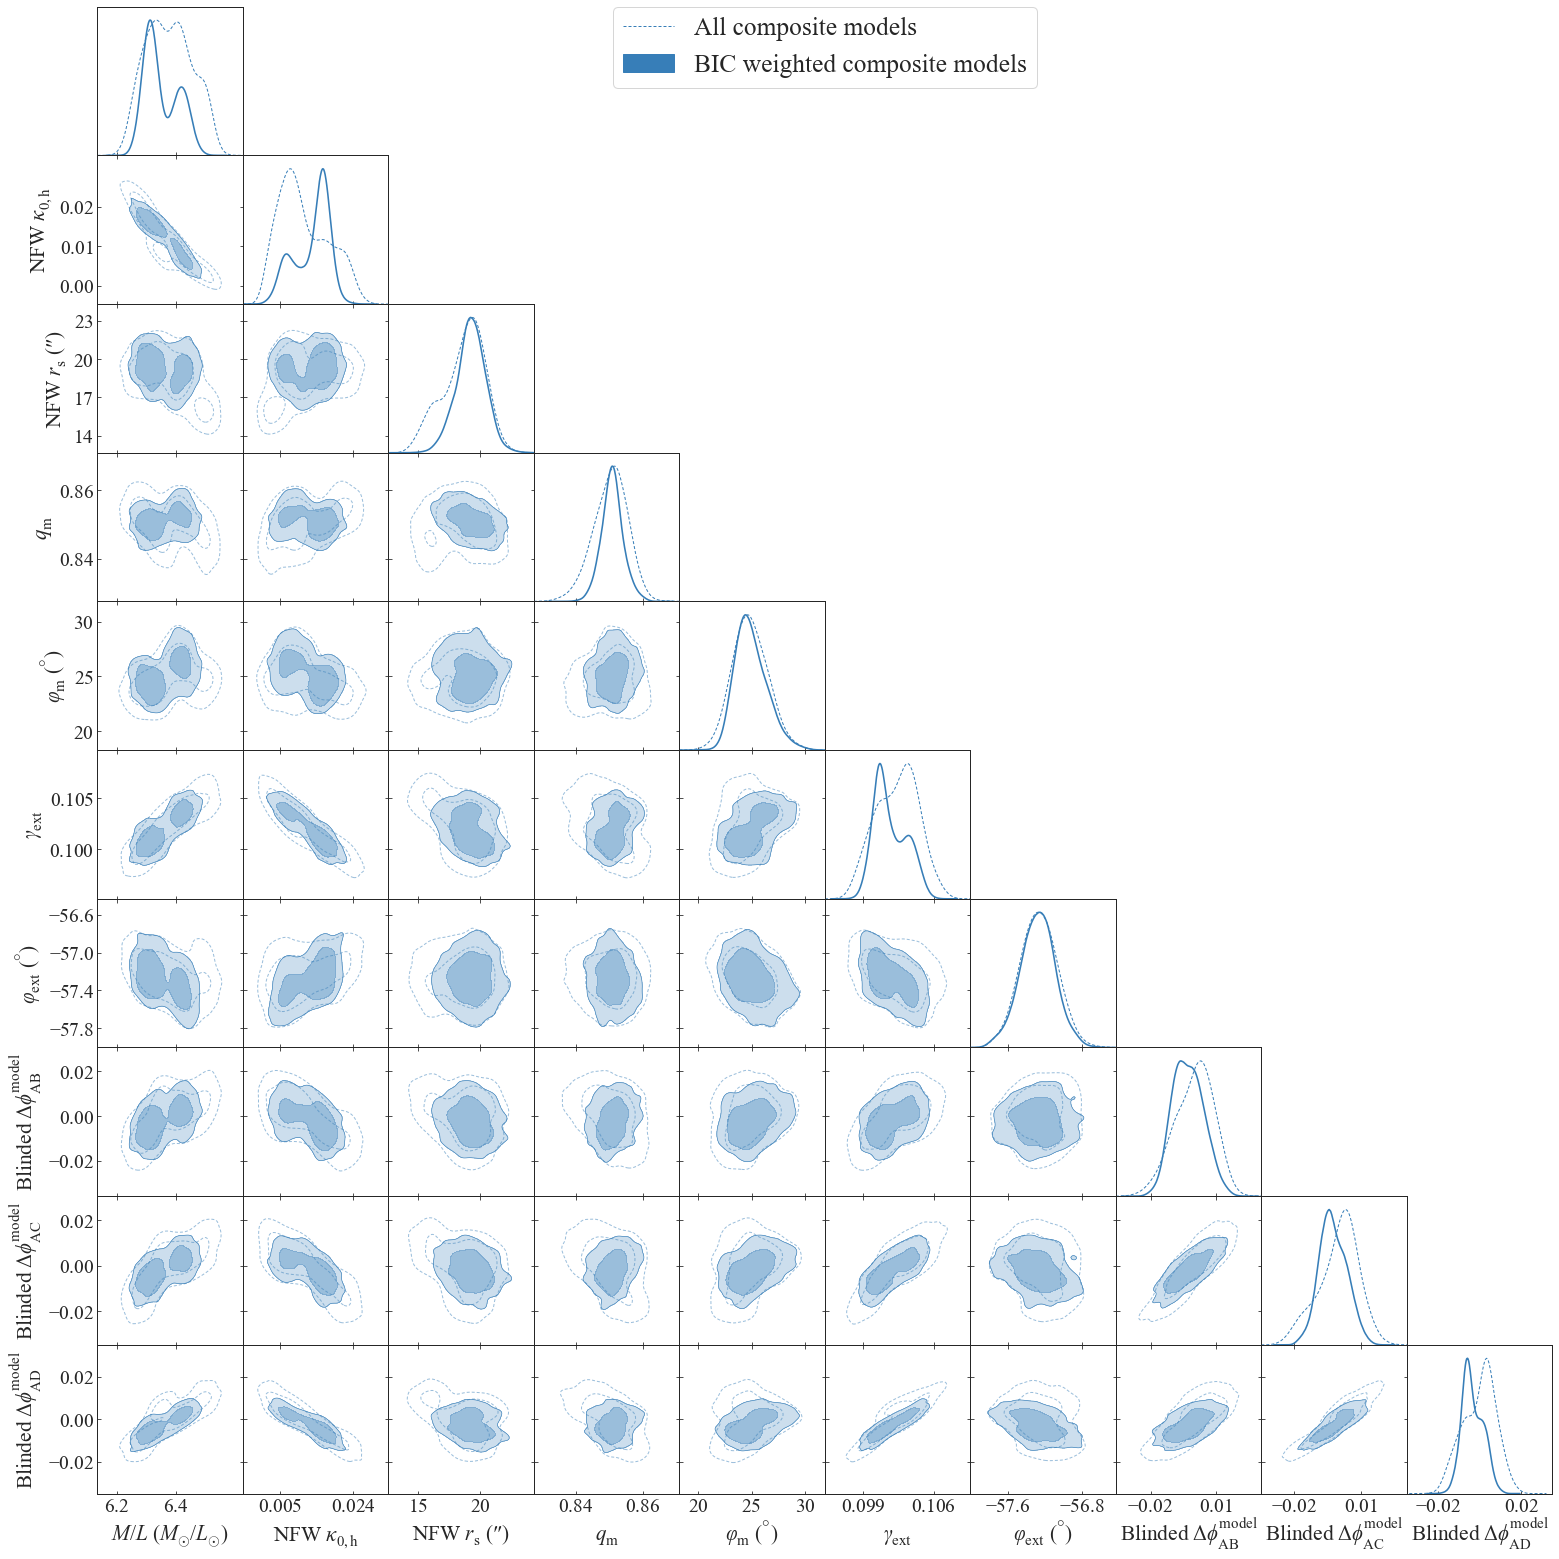

In [17]:
%matplotlib inline

#weight,td_ab,td_ac,td_ad,M/L,kappa_0h,r_s,q,theta_q,gamma_ext,theta_gamma

#weight,td_ab,td_ac,td_ad
all_comp_samples = np.copy(glee_composite_samples_eq_weight[:, [5, 6, 7, 8, 9, 10, 11, 2, 3, 4]])

#mean_gamma = np.mean(all_pl_samples[1])
mean_dphi_AB = np.mean(all_comp_samples[:, -3])
mean_dphi_AC = np.mean(all_comp_samples[:, -2])
mean_dphi_AD = np.mean(all_comp_samples[:, -1])

# blinding some parameters
#all_pl_samples[1] = all_pl_samples[1]/mean_gamma - 1.
all_comp_samples[:, -3] = all_comp_samples[:, -3]/mean_dphi_AB - 1.
all_comp_samples[:, -2] = all_comp_samples[:, -2]/mean_dphi_AC - 1.
all_comp_samples[:, -1] = all_comp_samples[:, -1]/mean_dphi_AD - 1.


glee_composite_mc_samples= MCSamples(samples=all_comp_samples, 
                               names=['ML', 
                                      'kappa_0h', 'r_s', 'q_m', 'phi_m', 'gamma_ext', 'psi_ext', #'invariant_grad',
                                      'dphi_AB', 'dphi_AC', 'dphi_AD'
                                     ], 
                              labels=['M/L \\ (M_{\\odot}/L_{\\odot})', 
                                      '{\\rm{NFW}}\\ \\kappa_{0,\\rm h}', #'{\\gamma}/\\overline{{\\gamma}} - 1',
                                      '{\\rm{NFW}}\\ r_{\\rm s}\\ {(\prime\prime)}',
                                      'q_{\\rm m}',
                                      '\\varphi_{\\rm m}\\ {(^{\circ})}',
                                      '\\gamma_{\\rm{ext}}', 
                                      '\\varphi_{\\rm{ext}}\\ {(^{\circ})}',
                                      #'\\xi_{\\rm rad}',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AB}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AB} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AB}} - 1',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AC}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AC} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AC}} - 1',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AD}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AD} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AD}} - 1',
                                     ],
                  )

smoothing_scale = 0.3
glee_composite_mc_samples.updateSettings({'smooth_scale_2D': smoothing_scale})
glee_composite_mc_samples.updateSettings({'smooth_scale_1D': smoothing_scale})


bic_weighted_comp_samples = np.copy(glee_composite_samples_bic_weight[:, [5, 6, 7, 8, 9, 10, 11, 2, 3, 4]])

#mean_gamma = np.mean(all_pl_samples[1])
# mean_dphi_AB = np.mean(bic_weighted_comp_samples[-3])
# mean_dphi_AC = np.mean(bic_weighted_comp_samples[-2])
# mean_dphi_AD = np.mean(bic_weighted_comp_samples[-1])

# blinding some parameters
#all_pl_samples[1] = all_pl_samples[1]/mean_gamma - 1.
bic_weighted_comp_samples[:, -3] = bic_weighted_comp_samples[:, -3]/mean_dphi_AB - 1.
bic_weighted_comp_samples[:, -2] = bic_weighted_comp_samples[:, -2]/mean_dphi_AC - 1.
bic_weighted_comp_samples[:, -1] = bic_weighted_comp_samples[:, -1]/mean_dphi_AD - 1.


glee_composite_mc_samples_bic = MCSamples(samples=bic_weighted_comp_samples, 
                               names=['ML', 
                                      'kappa_0h', 'r_s', 'q_m', 'phi_m', 'gamma_ext', 'psi_ext', #'invariant_grad',
                                      'dphi_AB', 'dphi_AC', 'dphi_AD'
                                     ], 
                              labels=['M/L \\ (M_{\\odot}/L_{\\odot})', 
                                      '{\\rm{NFW}}\\ \\kappa_{0,\\rm h}', #'{\\gamma}/\\overline{{\\gamma}} - 1',
                                      '{\\rm{NFW}}\\ r_{\\rm s}\\ {(\prime\prime)}',
                                      'q_{\\rm m}',
                                      '\\varphi_{\\rm m}\\ {(^{\circ})}',
                                      '\\gamma_{\\rm{ext}}', 
                                      '\\varphi_{\\rm{ext}}\\ {(^{\circ})}',
                                      #'\\xi_{\\rm rad}',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AB}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AB} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AB}} - 1',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AC}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AC} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AC}} - 1',
                                      '{\\rm Blinded}\\ \\Delta \\phi_{\\rm AD}^{\\rm model}', #'\\Delta \\phi^{\\rm eff}_{\\rm AD} / \\overline{\\Delta \\phi^{\\rm eff}_{\\rm AD}} - 1',
                                     ],
                  )

smoothing_scale = 0.3
glee_composite_mc_samples_bic.updateSettings({'smooth_scale_2D': smoothing_scale})
glee_composite_mc_samples_bic.updateSettings({'smooth_scale_1D': smoothing_scale})

    
### 

pf.set_fontscale(2.)

g = plots.getSubplotPlotter(subplot_size=2.2)
g.settings.lw_contour = 1.
g.settings.alpha_factor_contour_lines = 2.
g.settings.solid_contour_palefactor = 0.5
g.settings.axes_fontsize = 22
g.settings.lab_fontsize = 24

g.settings.legend_fontsize = 28

colors = [pf.cb_blue, pf.cb_blue]

g.triangle_plot([glee_composite_mc_samples, glee_composite_mc_samples_bic],
                 legend_labels=['All composite models', 
                                'BIC weighted composite models'],
                 filled=[False, True], shaded=False,
                 alpha_filled_add=.5, 
                 contour_lws=[1., 1.6], 
                 contour_ls=['--', '-'],
                 normalized=[False, False],
                 #filled=False,
                 #contour_colors=[sns.xkcd_rgb['emerald'], sns.xkcd_rgb['bright orange']], 
                 contour_args={'alpha': .5},
                 #line_args={'lw': 7., "zorder": 30},
                 #line_args={'lw': 1., 'alpha': 1.}
                 contour_colors=colors,
                 param_limits={
#                      'theta_E': (1.36, 1.40), #'psi_ext': (-38, -26), 
#                                'gamma': (2.25, 2.42),
#                                'q_m': (0.55, 0.68),
#                                'phi_m': (32, 42), 
#                                'gamma_ext': (0.06, 0.1), 
#                                'psi_ext': (-64, -50)
                             #'dphi_AC': (-1, 1),
                             'dphi_AD': (-0.035, 0.035)
                               #'invariant_grad': (-0.8, 0.8)
                              },
                 #fontsize=100
               )


#g.fig.tight_layout()
if True:
    #pass
    g.fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/2038_model/figures/glee_composite_posterior.pdf', bbox_inches='tight')